In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

from skimage import color

c:\Users\moham\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 1: For Gray Image


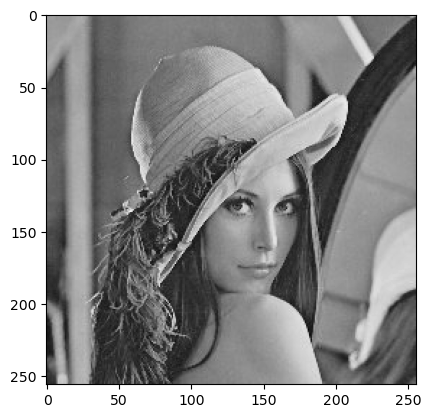

In [7]:
read_image = Image.open("./images/gray image.jpg")
plt.imshow(read_image, cmap='gray')

In [8]:
arr_image = np.array(read_image)
arr_image.shape

(256, 256)

In [9]:
U, S, VT = np.linalg.svd(arr_image)

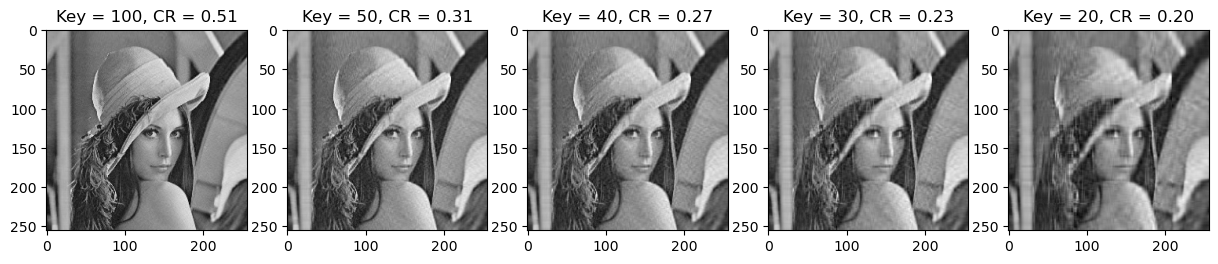

In [10]:

keys = [100, 50, 40, 30, 20]

fig, axs = plt.subplots(1, len(keys), figsize=(15, 15))

for i, key in enumerate(keys):
    K = S[:key]
    S_diag = np.diag(K)
    U_new = U[:, :key]
    VT_new = VT[:key, :]
    new_image = U_new @ S_diag @ VT_new

    # Calculate the compression ratio
    CR = (arr_image.shape[0] * key + key + 30*arr_image.shape[0]
          ) / (arr_image.shape[0]*arr_image.shape[0])

    axs[i].imshow(new_image, cmap='gray')
    axs[i].set_title(f'Key = {key}, CR = {CR:.2f}')

plt.show()

# 2: For Color Image


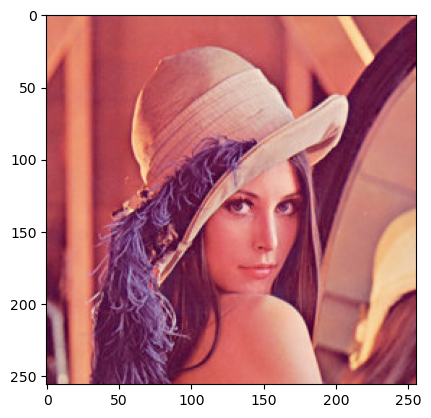

In [11]:
img = Image.open("./images/color image.png")
img_array = np.array(img)

plt.imshow(img_array)

In [12]:
# convert the image from RGB to grayscale using 5 method

gray_image_1 = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
gray_image_2 = Image.fromarray(img_array).convert('L')
gray_image_3 = plt.imread("./images/gray image.jpg", 0)
gray_image_4 = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])
gray_image_5 = color.rgb2gray(img_array)

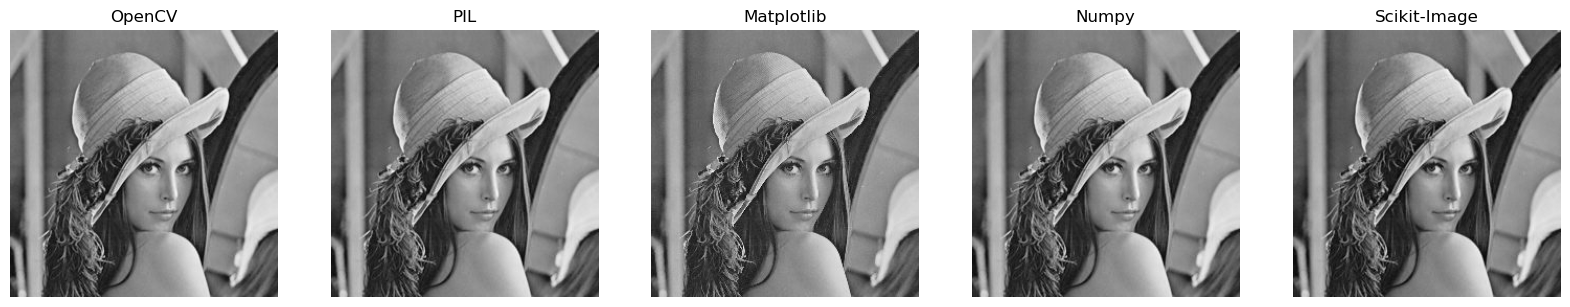

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

images = [gray_image_1, gray_image_2, gray_image_3, gray_image_4, gray_image_5]
titles = ['OpenCV', 'PIL', 'Matplotlib', 'Numpy', 'Scikit-Image']

for i, img in enumerate(images):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.show()

In [14]:
def plot_images_with_compression_ratio(U, S, VT, arr_image, keys):
    fig, axs = plt.subplots(1, len(keys), figsize=(15, 15))

    for i, key in enumerate(keys):
        K = S[:key]
        S_diag = np.diag(K)
        U_new = U[:, :key]
        VT_new = VT[:key, :]
        new_image = U_new @ S_diag @ VT_new

        CR = (arr_image.shape[0] * key + key + 30*arr_image.shape[0]
              ) / (arr_image.shape[0]*arr_image.shape[0])

        axs[i].imshow(new_image, cmap='gray')
        axs[i].set_title(f'Key = {key}, CR = {CR:.2f}')
    plt.savefig('output.png')
    plt.show()

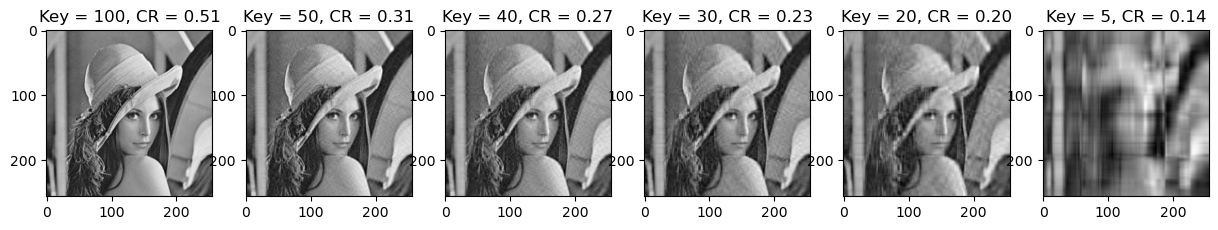

In [15]:
keys = [100, 50, 40, 30, 20, 5]
U, S, VT = np.linalg.svd(gray_image_1)

plot_images_with_compression_ratio(U, S, VT, gray_image_1, keys)

# 3. Comparing images with compression


## 3.1 Cosine similarity


In [16]:

from sklearn.metrics.pairwise import cosine_similarity


key = 5
K = S[:key]
S_diag = np.diag(K)
U_new = U[:, :key]
VT_new = VT[:key, :]
compressed_image = U_new @ S_diag @ VT_new


original_image_flat = arr_image.flatten()
compressed_image_flat = compressed_image.flatten()

original_image_flat = original_image_flat.reshape(1, -1)
compressed_image_flat = compressed_image_flat.reshape(1, -1)

similarity = cosine_similarity(original_image_flat, compressed_image_flat)

print("Cosine similarity:", similarity[0][0])

Cosine similarity: 0.9780931745979095


## 3.2 MSE and MAE


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate the MSE
mse = mean_squared_error(arr_image, compressed_image)

# Calculate the MAE
mae = mean_absolute_error(arr_image, compressed_image)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 768.737893271933
Mean Absolute Error: 20.310413032324593
